# Spaghettification of the Magic School Bus

**Prepared by:** Logan Hennes (lhennes@nd.edu) and Joseph Emery (jemery@nd.edu)

**Edited by:** Kristin Swartz-Schult (kswartzs@nd.edu)

**Reference:** This is an original problem created by the authors with inspiration from Dr. Brian Olson's  class on problem solving.

**Intended Audience:** This problem is intended for sophomores or juniors from the University of Notre Dame who are taking an introductory physics course. 

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:



*   Perform a degrees of freedom analysis
*   Solve a nonlinear system of equations using Newton's Method and Python tools
*   Properly visualize data using Matplotlib




## Resources

Relevant modules from the class website:

1.5. [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)

6.1. [Modeling Systems of Nonlinear Equations: Flash Calculation Example](https://ndcbe.github.io/data-and-computing/notebooks/06/Modeling-Systems-of-Nonlinear-Equations.html)

6.2. [Newton-Raphson Method in One Dimension](https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Raphson-Method-in-One-Dimension.html#)

6.3. [More Newton-Type Methods](https://ndcbe.github.io/data-and-computing/notebooks/06/More-Newton-Type-Methods.html)

6.6. [Newton's Method in Scipy](https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Methods-in-Scipy.html)

## Import Libraries

In [30]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

## Problem Statement

Ms. Frizzle and her students have boarded the Magic School Bus for an adventure into outer space. However, while exploring the Milky Way, an asteroid collides with the bus, hurtling it toward a black hole at the center of the galaxy known as Sagittarius A*. 

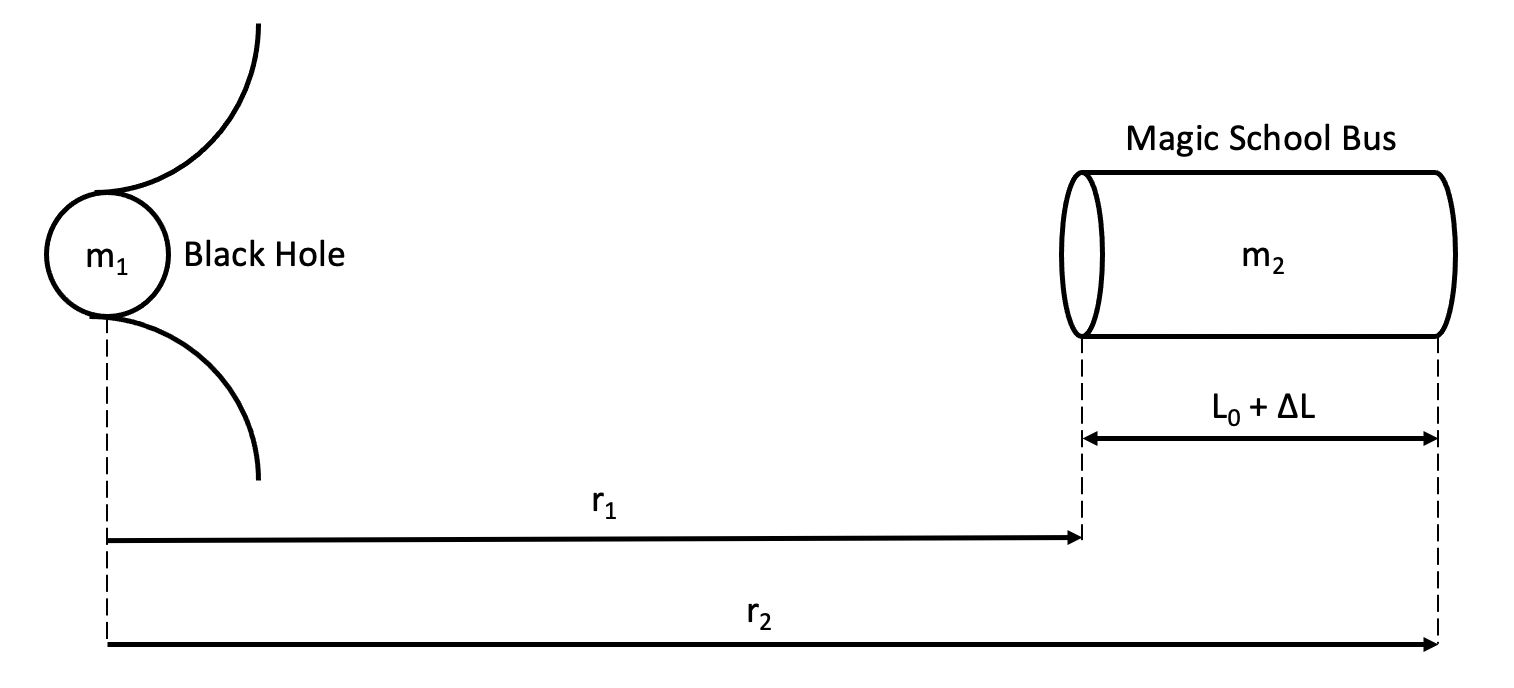

You are going to write a Python script to find at what distance away the Magic School Bus needs to be to experience a certain amount of stretching by a black hole. You will need to use Newton‚Äôs law of universal gravitation and Young's modulus.

$$F = G\frac{m_1m_2}{r^2}$$

$$‚àÜL = \frac{1}{Y}\frac{F}{A}\ L_0 $$

$F$ = the force exerted on an object by gravity

$G$ = the gravitational constant

$m_1$ = the mass of the black hole

$m_2$ = the mass of the magic school bus

$r_1$ = the distance between the black hole and the front of the bus

$r_2$ = the distance between the black hole and the back of the bus

$\Delta L$ = the change in length of the bus

$Y$ = a measure of a solid's resistance to elastic deformation under a load (Young's modulus)

$F$ = the force exerted on the object being stretched

$A$ = the cross-sectional area of the bus

$L_0$ = the length of the bus before stretching

## 1. Degree of freedom analysis

### 1.1. Setup

Define the constants used in this problem. Use scholarly sources such as NASA to determine the mass of Sagittarius A*. Approximate the bus as a cylinder, using the height of the bus as the diameter of the front face.

In [ ]:
# Given constants
Y = 69e9 # Young's modulus for aluminum, N/m^2
m_2 = 11000 # mass of school bus, kg
L_0 = 10 # length of school bus, meters
h = 3.5 # height of bus, meters

#Add your solution here

In [31]:
### BEGIN SOLUTION
# Given constants
Y = 69e9 # Young's modulus for aluminum, N/m^2
m_2 = 11000 # mass of school bus, kg
L_0 = 10 # length of school bus, meters
h = 3.5 # height of bus, meters

# Add your solution here
G = 6.67e-11  # gravitational constant, N m^2/kg^2
Solar_Mass = 1.989e30  # value of one solar mass, kg
m_1 = Solar_Mass * 4.297e6  # mass of Sagittarius A*, kg
A = np.pi*(h/2)**2 # are at front of bus, m^2
### END SOLUTION

### 1.2. Analysis

Perform a degree of freedom analysis using the equations provided and the unknown variables. What does this analysis tell you? How should you approach the problem moving forward?

**Discuss** in 2-4 sentences

**Answer:**

In [ ]:
### BEGIN SOLUTION
"""
There are two equations and three unknowns -- the tensile force due to the black hole's gravity,
the change in the length of the bus, and the distance from the black hole. There is more than one
solution to this system. In order to provide a unique solution, one of the variables must be fixed,
whether it be the distance from the black hole to the front of the bus, the change in the length of the bus,
or the differential force experienced by the bus.
"""
### END SOLUTION

Submit your written work via **Gradescope**.

## 2. Nonlinear equation

### 2.1. Define a nonlinear equation

Combining Newton‚Äôs law of universal gravitation and Young's modulus, write a single, nonlinear equation in canonical form, $c(r_1,Œîùêø) = 0$. 

*Hint*: Just like a tidal force, the tensile force on the bus will be generated by the difference in gravitational force between the front of the bus (nearer to the black hole) and the back of the bus (further from the black hole).

Submit your written work via **Gradescope**.

In [ ]:
### BEGIN SOLUTION
"""
0 = ((L_0 * G * m_1 * m_2) / (Y * A)) * ((1 / r^2) - (1 / (r + L_0 + ŒîL)^2)) - ŒîL
"""
### END SOLUTION

### 2.2. Define a function that returns the residuals

Using the equation you derived in **2.1**, write a Python function that returns its residual given some value of $r_1$ and some value of $\Delta L$.

In [ ]:
# function for nonlinear equation residual
def residual_function(r_1,ŒîL):
    ''' Returns the residual of the nonlinear equation given in canonical form
    
    Args:
        r_1, ŒîL
        
    Returns:
        residual    
    '''
  # Add your solution here
    residual = 
    return residual

In [32]:
### BEGIN SOLUTION
# function for nonlinear equation residual
def residual_function(r_1,ŒîL):
    ''' Returns the residual of the nonlinear equation given in canonical form
  
  Args:
      r_1, ŒîL
      
  Returns:
      residual    
  '''
  # Add your solution here
    residual =  ((L_0 * G * m_1 * m_2) / (Y * A)) * ((1 / r_1**2) - (1 / (r_1 + L_0 + ŒîL)**2)) - ŒîL
    return residual
### END SOLUTION

### 2.3. Plot the residuals

Next, define an array of $r_1$ values and an array of $\Delta L$ values. Use these arrays to calculate the residual for each pair of $r_1$ and $\Delta L$ values. Use the 3-D plot function in Matplotlib to analyze the results.

*Hint*: Try $\Delta L$ values in the tens to hundreds of meters and $r_1$ values on the order of $10$ to $10^{10}$ meters.

In [ ]:
# Create array
# Add your solution here

# Initialize matrix
# Add your solution here

for i in range(len(r_1)):
    for j in range(len(ŒîL)):
        r_grid[i,j] = r_1[i]
        # Add your solution here 

#Plot figure
fig, ax = plt.subplots(figsize = (6.4,4), dpi=300)
plt.xscale('log')

cs = ax.contourf(r_grid, ŒîL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Residual', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

cs2 = plt.contour(cs, levels=cs.levels[::15], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

# plot heatmap label
plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

# define tick size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# plot titile and x,y label
plt.xlabel('Distance (m)', fontsize=16, fontweight='bold')
plt.ylabel('ŒîL (m)', fontsize=16, fontweight='bold')
plt.title('Contour of Residuals', fontsize=16, fontweight='bold')
plt.show()
### END SOLUTION

/var/folders/tk/4cs7tv315mq209yzyj47_wd80000gn/T/ipykernel_76301/1539189335.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(r_grid, ŒîL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)


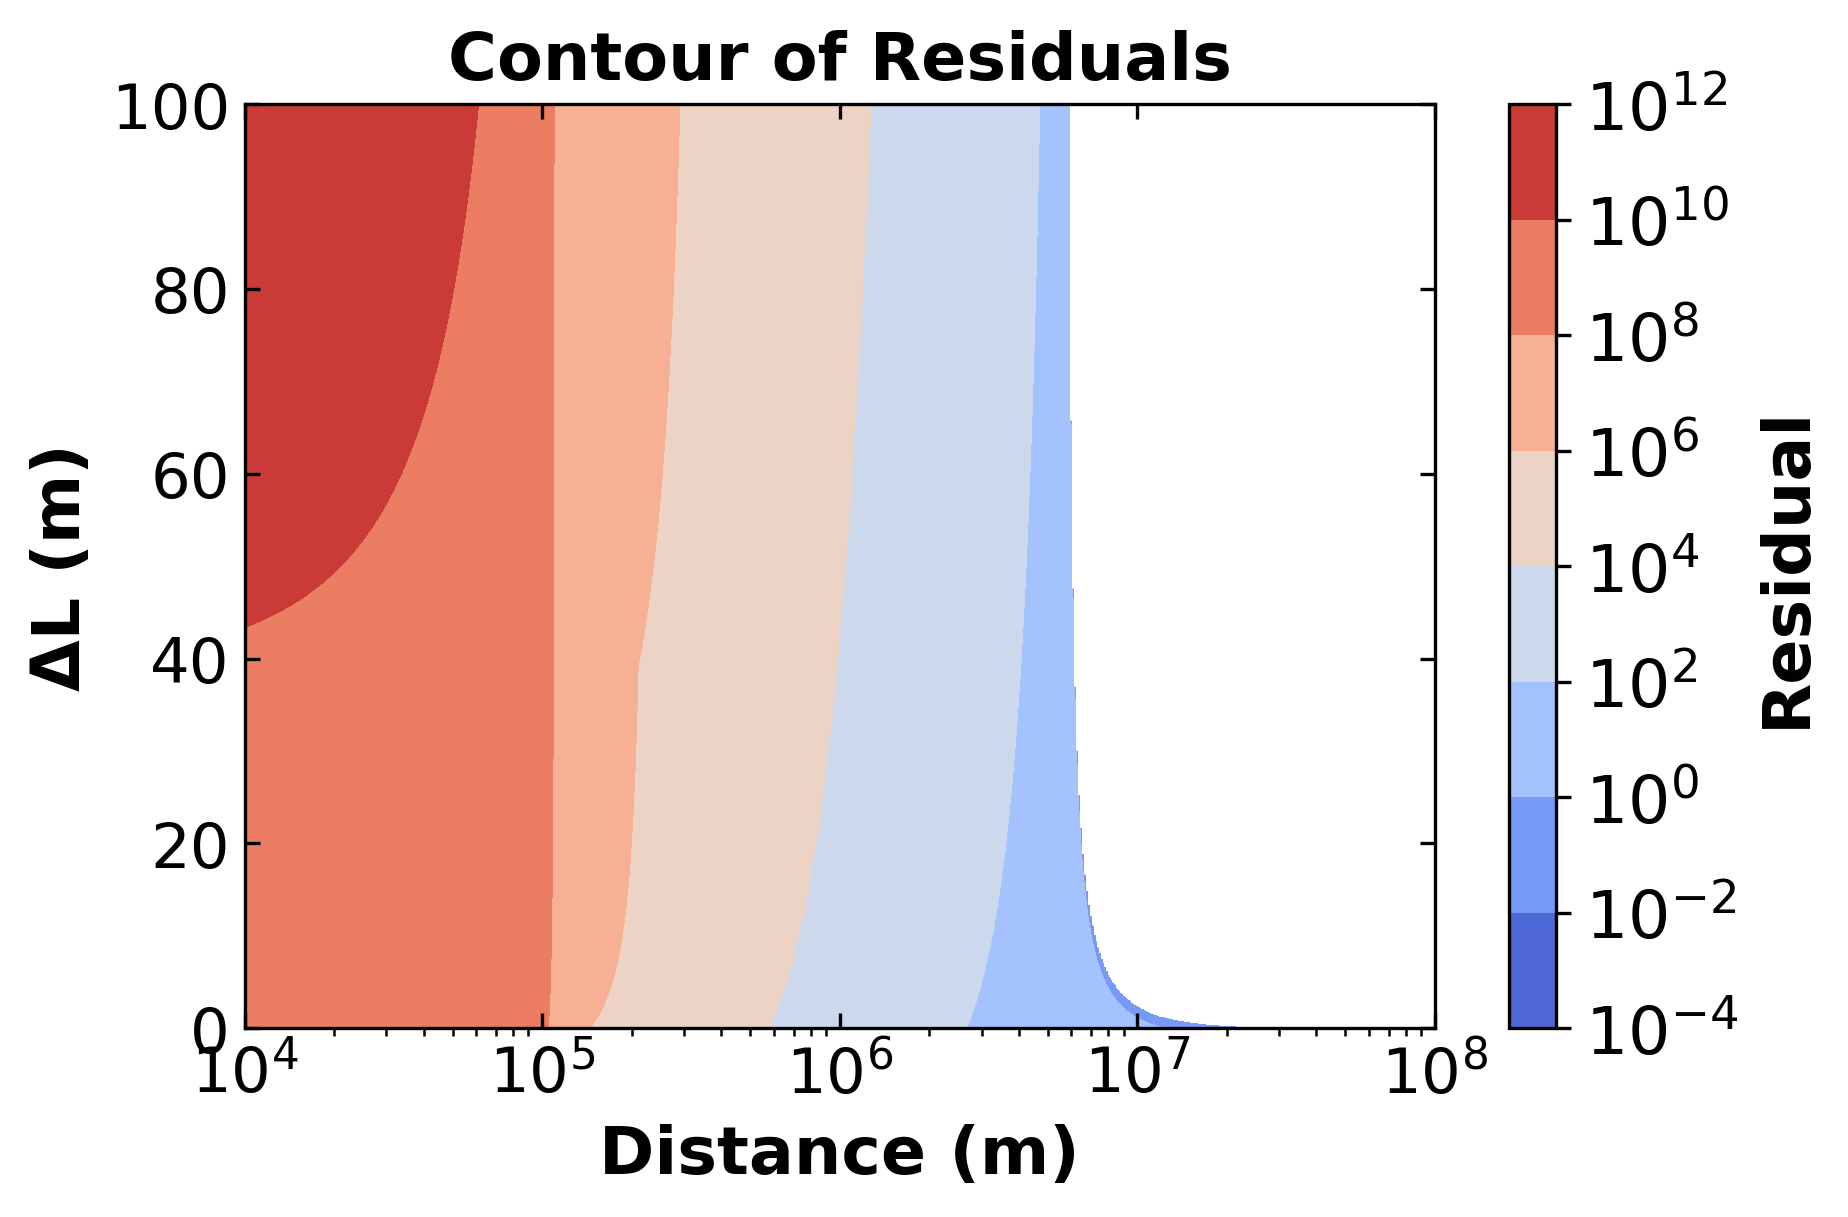

In [33]:
### BEGIN SOLUTION
# Create array
r_1 = np.linspace(1e4, 1e8, 1000)
ŒîL = np.linspace(0, 100, 1000)

# Initialize matrices
r_grid = np.zeros((len(r_1), len(ŒîL)))
ŒîL_grid = np.zeros((len(r_1), len(ŒîL)))
f_grid = np.zeros((len(r_1), len(ŒîL)))

for i in range(len(r_1)):
    for j in range(len(ŒîL)):
        r_grid[i, j] = r_1[i]
        # Add your solution here
        ŒîL_grid[i, j] = ŒîL[j]

#fill f_grid
f_grid = residual_function(r_grid, ŒîL_grid)

#Plot figure
fig, ax = plt.subplots(figsize = (6.4,4), dpi=300)
plt.xscale('log')

cs = ax.contourf(r_grid, ŒîL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Residual', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

cs2 = plt.contour(cs, levels=cs.levels[::15], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

# plot heatmap label
plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

# define tick size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# plot titile and x,y label
plt.xlabel('Distance (m)', fontsize=16, fontweight='bold')
plt.ylabel('ŒîL (m)', fontsize=16, fontweight='bold')
plt.title('Contour of Residuals', fontsize=16, fontweight='bold')
plt.show()
### END SOLUTION

#### 2.3.1 Discussion

What does the 3-D plot tell you about the solution? Are there multiple solutions?

**Discuss** in 1-3 sentences.

**Answer:**

In [ ]:
### BEGIN SOLUTION
"""
There are multiple solutions. The amount the bus stretches will change with its distance from the black hole. 
"""
### END SOLUTION

## 3. Inexact Newton's Method

Typically, a body of aluminum can be subjected to 10% to 25% elongation before deformation becomes permanent (plastic deformation). For simplicity, we will define our maximum tolerance for stretching to be one meter. Solve for the distance when the bus experiences this stretching using the inexact Newton's Method.

In [34]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False,max_iter=50):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of [function]
        x0: initial guess [float]
        delta: finite difference parameter [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(delta) is float, "Warning: 'delta' should be a float"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0

    # print intial guess
    #if (LOUD):
        #print("x0 =",x0)
    
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        print(f'Guess {iterations}: {x}')
        
        # evaluate function 'f' at new 'x'
        fx = f(x)
        print(f'Residual {iterations}: {fx}\n')
        
        # calculate 'slope'
        slope = (f(x+delta)-f(x))/delta
        
        # print every iteration
        #if (LOUD):
            #print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        
        iterations += 1
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
            
    if (LOUD):
      print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

### 3.1. Implementing inexact Newton's
You will need to write a new function for your nonlinear equation so that the only variable is $r_1$. This can be achieved by fixing the value of $\Delta L$ to be one meter. Use this function to implement inexact Newton's.

For more information on how to use the inexact Newton's Method, click [here](https://ndcbe.github.io/data-and-computing/notebooks/06/More-Newton-Type-Methods.html)

In [ ]:
# Set value of ŒîL
ŒîL = 1              #length the bus is streteched, meters
guess = 100_000     #distance from black hole, meters

# Define f(r_1) for the given ŒîL; use canonical form
# Add your solution here

In [35]:
### BEGIN SOLUTION
# Set value of ŒîL
ŒîL = 1
guess = 100_000

# Define f(r_1) for the given ŒîL; use canonical form
# Add your solution here
canonical_form = lambda r_1: ((L_0 * G * m_1 * m_2) / (Y * A)) * ((1 / r_1**2) - (1 / (r_1 + L_0 + ŒîL)**2)) - ŒîL
### END SOLUTION

In [ ]:
# Use inexact_newton to find a solution
# Add your solution here

In [36]:
### BEGIN SOLUTION
# Use inexact_newton to find a solution
newton_sln = inexact_newton(canonical_form, guess, epsilon=1e-2, LOUD=True)
print('The result of the inexact newton function is', newton_sln)
### END SOLUTION

Guess 0: 100000
Residual 0: 2077755.3674266443

Guess 1: 128364.93230407775
Residual 1: 982360.3477070075

Guess 2: 208830.37649762759
Residual 2: 228165.01024245314

Guess 3: 246208.5116013881
Residual 3: 139227.4485254872



ZeroDivisionError: float division by zero

#### 3.1.1. Discussion

Did the inexact Newton's Method work? Try a few different initial guesses for $r_1$.

**Discuss** in 1 or 2 sentences.

**Answer:**

In [ ]:
### BEGIN SOLUTION
"""
The inexact Newton's Method keeps encountering division by zero. This is because subsequent guesses are
generating nearly equal answers and leading the slope to be calculated as zero.
"""
### END SOLUTION

### 3.2. Troubleshooting inexact Newton's

Consider the order of magnitude of our guesses and our correspodnig intial residuals. Do you think the default step size, ```delta = 1.0e-7```, is appropriate for our problem? Try running inexact Newton's with progressively larger step sizes until you find one that works for an initial guess of $r_1 = 100,000$ meters. 

In [ ]:
# Use inexact_newton to find solution
# Add your solution ehre

In [38]:
### BEGIN SOLUTION
# Use inexact_newton to find solution
delta = 1.0
newton_sln = inexact_newton(canonical_form, guess, delta = delta, epsilon=1e-2, LOUD=True)
print('The result of the inexact newton function is', newton_sln)
### END SOLUTION

Guess 0: 100000
Residual 0: 2077755.3674266443

Guess 1: 133335.81739941452
Residual 1: 876539.6319734784

Guess 2: 177783.53889143027
Residual 2: 369785.7367675986

Guess 3: 237047.05907945527
Residual 3: 156001.7780356129

Guess 4: 316064.7386210726
Residual 4: 65812.57209957817

Guess 5: 421420.53716633125
Residual 5: 27764.288028924195

Guess 6: 561891.4661279671
Residual 6: 11712.757107201945

Guess 7: 749175.040867439
Residual 7: 4941.0463061199025

Guess 8: 998851.8586936642
Residual 8: 2084.2390800205067

Guess 9: 1331645.8383812758
Residual 9: 879.0243440693794

Guess 10: 1775025.7183716786
Residual 10: 370.576542279553

Guess 11: 2365110.3665443407
Residual 11: 156.0757026458498

Guess 12: 3148474.4408281716
Residual 12: 65.58301910899844

Guess 13: 4182249.3172298237
Residual 13: 27.407617109269168

Guess 14: 5527224.847222105
Residual 14: 11.306755808452309

Guess 15: 7219972.172748446
Residual 15: 4.521520796924896

Guess 16: 9190590.90150826
Residual 16: 1.676918761531481

#### 3.2.1. Discussion

Why was the smaller delta value leading to division by zero?

**Discuss** in 1-3 sentences.

**Answer:**

In [ ]:
### BEGIN SOLUTION
'''
Because of the order of magnitude of our inputs and outputs, altering inputs by such a small step size was
bumping up against the limits of floating point precision, causing the difference between to equation outputs
to compute as zero.
'''
### END SOLUTION

## 4. Exact Newton's Method using Scipy

Now that we've estimated a solution at $\Delta L = 1$ using inexact Newton's, let's try using SciPy to solve this problem.


### 4.1. Setup equations

When using Newton's Method in Scipy, the derivative of $f(r_1)$ is required to determine the solution. Calculate the derivative of $f(r_1)$ and define it as a function in Python.

Submit your written work via **Gradescope**

In [ ]:
# Set value of ŒîL
ŒîL = 1
guess = 100_000

def derivative_form(r_1):
    ''' Find max distance using canonical derivative
    
    Args:
        r_1
        
    Returns:
        derivative    
    '''
    # Add your solution here
    derivative = 
    return derivative

In [39]:
### BEGIN SOLUTION
# Set value of ŒîL
ŒîL = 1
guess = 100_000

def derivative_form(r_1):
    ''' Find max distance using canonical derivative
    
    Args:
        r_1
        
    Returns:
        derivative    
    '''

    
    derivative = (L_0) / (Y * A) * G * m_1 * m_2 * (2/(L_0 + ŒîL + r_1)**3 - 2/r_1**3)
    return derivative
### END SOLUTION

### 4.2. Use Scipy to determine $r_1$

In [ ]:
# Use SciPy's Newton method
# Add your solution here
scipy_sln = 
print('The result of the scipy optimize newton function is \n',scipy_sln)


In [40]:
### BEGIN SOLUTION
# Use SciPy's Newton method
scipy_sln = optimize.newton(func=canonical_form, x0 = guess, fprime=derivative_form, tol=1e-2, full_output=True)
print('The result of the scipy optimize newton function is \n',scipy_sln)
### END SOLUTION

The result of the scipy optimize newton function is 
 (12761113.50181692,       converged: True
           flag: converged
 function_calls: 44
     iterations: 22
           root: 12761113.50181692)


## 5. Analysis and Comparison of Each Method

### 5.1. Testing the inexact Newton's Method

Test the inexact Newton's Method with guesses of different orders of magnitude. Find a guess that gives you a solution and a guess that does not. You should continue adjusting your initial guess until you get an error.

*Hint:* Remember to pass a reasonable value for delta to ```inexact_newton```.

In [ ]:
# Intial guess
# add your solution here
guess1 =
newton_sln1 = 
print("The root using the inexact newton function for guess2 is found at", newton_sln1)

In [41]:
### BEGIN SOLUTION
# Initial Guess
guess1 = 1e2
newton_sln1 = inexact_newton(canonical_form, guess1, delta = 1.0, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess2 is found at", newton_sln1)
### END SOLUTION

Guess 0: 100.0
Residual 0: 1779396688341057.0

Guess 1: 135.70871381673226
Residual 1: 740287617039185.4

Guess 2: 183.3516956970089
Residual 2: 309058458886371.4

Guess 3: 246.89911947369208
Residual 3: 129364558441638.86

Guess 4: 331.6465520952954
Residual 4: 54255190565019.32

Guess 5: 444.65624650991634
Residual 5: 22787994444815.258

Guess 6: 595.3456569597986
Residual 6: 9581870128968.305

Guess 7: 796.2722222050768
Residual 7: 4032312039270.9365

Guess 8: 1064.1798155792612
Residual 8: 1697961491797.7612

Guess 9: 1421.3940657445287
Residual 9: 715325958679.188

Guess 10: 1897.682824515651
Residual 10: 301461600693.3122

Guess 11: 2532.7368204306767
Residual 11: 127079042732.76134

Guess 12: 3379.477219071339
Residual 12: 53579828398.53758

Guess 13: 4508.4657198282475
Residual 13: 22593982890.42541

Guess 14: 6013.784697524499
Residual 14: 9528671312.327644

Guess 15: 8020.877400027863
Residual 15: 4018906981.5285544

Guess 16: 10697.001551751415
Residual 16: 1695159651.264379

In [ ]:
# Higher guess
# add your solution here
guess2 =
newton_sln2 = 
print("The root using the inexact newton function for guess2 is found at", newton_sln2)

In [42]:
### BEGIN SOLUTION
# Higher guess
guess2 = 1e6
newton_sln2 = inexact_newton(canonical_form, guess2, delta = 1.0, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess2 is found at", newton_sln2)
### END SOLUTION

Guess 0: 1000000.0
Residual 0: 2077.064915367613

Guess 1: 1333175.7597753783
Residual 1: 875.9981457928803

Guess 2: 1777064.3732635635
Residual 2: 369.29919074037207

Guess 3: 2367820.155411785
Residual 3: 155.5370374879682

Guess 4: 3152047.145116894
Residual 4: 65.35686941627573

Guess 5: 4186924.9157805927
Residual 5: 27.31255390260715

Guess 6: 5533300.869885832
Residual 6: 11.266258838866499

Guess 7: 7227393.696748207
Residual 7: 4.50452877772687

Guess 8: 9198544.641646804
Residual 8: 1.6699807839471856

Guess 9: 11116665.185947483
Residual 9: 0.5126625476845439

Guess 10: 12372595.476381885
Residual 10: 0.09719357366585712

It took 11 iterations
The root using the inexact newton function for guess2 is found at 12737754.529301692


In [ ]:
# Even higher guess
# add your solution here
guess3 =
newton_sln3 = 
print("The root using the inexact newton function for guess2 is found at", newton_sln3)

In [43]:
### BEGIN SOLUTION
guess3 = 1e12
newton_sln3 = inexact_newton(canonical_form, guess3, delta = 1.0, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess3 is found at", newton_sln3)
### END SOLUTION

Guess 0: 1000000000000.0
Residual 0: -0.9999999999999979



ZeroDivisionError: float division by zero

In [45]:
print("The result of guess1 is", newton_sln1, "\n")
print("The result of guess2 is", newton_sln2, "\n")
print("The result of guess3 is", newton_sln3)

The result of guess1 is 12752256.643475775 

The result of guess2 is 12737754.529301692 



NameError: name 'newton_sln3' is not defined

#### 5.1.1. Discussion

How do the number of iterations required to converge change with the initial guess?

**Discuss** in 1 - 2 sentences.

**Answer:**

In [ ]:
#### BEGIN SOLUTION
"""
The better the initial guess, the more quickly the inexact Newton's method converges. For a guess that is far
from the true value, the method might not converge at all.
"""
### END SOLUTION

### 5.2. Finding the limits of the inexact Newton's Method

Determine the upper and lower limit for an intial guess where the inexact Newton's Method gives a usable solution. Continue making your guess larger until you get an error. The error is your upper limit. Then do the same for the lower limit.

In [ ]:
# Find the upper limit of inexact Newton's
# Add your solution here

In [46]:
### BEGIN SOLUTION
# Find the upper limit using scipy method
upper_limit_inexact = 20.255e6
inexact_newton(canonical_form, upper_limit_inexact, delta = 1.0, epsilon=1.0e-2, LOUD=True)

### END SOLUTION

Guess 0: 20255000.0
Residual 0: -0.7499256322111911

Guess 1: -15054.494520939887
Residual 1: -609738952.5990518

Guess 2: -20070.15849125805
Residual 2: -257259265.92451903

Guess 3: -26757.71068325505
Residual 3: -108539368.04275693

Guess 4: -35674.447191027415
Residual 4: -45792613.81668643

Guess 5: -47563.42945585742
Residual 5: -19319571.733188815

Guess 6: -63415.40636500947
Residual 6: -8150701.718564938

Guess 7: -84551.3774541377
Residual 7: -3438658.9051913465

Guess 8: -112732.67870982541
Residual 8: -1450710.1978667194

Guess 9: -150307.76417317457
Residual 9: -612026.7691303235

Guess 10: -200407.93198444886
Residual 10: -258201.63959173448

Guess 11: -267208.34454244113
Residual 11: -108929.88163112903

Guess 12: -356276.079257975
Residual 12: -45955.32553686122

Guess 13: -475034.85393074446
Residual 13: -19387.74662652107

Guess 14: -633385.3905444695
Residual 14: -8179.49634671949

Guess 15: -844537.1289579207
Residual 15: -3450.995418887658

Guess 16: -1126127.85744

ZeroDivisionError: float division by zero

In [ ]:
# Find the lower limit of inexact Newton's for delta = 1.0
# Add your solution here

In [47]:
### BEGIN SOLUTION
# Find the lower limit of inexact Newton's for delta = 1.0
lower_limit_inexact = 10
inexact_newton(canonical_form, lower_limit_inexact, delta = 1.0, epsilon=1.0e-2, LOUD=True)
### END SOLUTION

Guess 0: 10
Residual 0: 7.30397679238864e+17

Guess 1: 15.040434888834593
Residual 1: 2.782650462545619e+17

Guess 2: 21.940392145763077
Residual 2: 1.0917175408693384e+17

Guess 3: 31.287034743375926
Residual 3: 4.367347854330747e+16

Guess 4: 43.86414759288348
Residual 4: 1.771255686338696e+16

Guess 5: 60.72150012198905
Residual 5: 7255737740891424.0

Guess 6: 83.26430420031042
Residual 6: 2994279811880757.0

Guess 7: 113.37114611165549
Residual 7: 1242505668600765.2

Guess 8: 153.550845437472
Residual 8: 517723165558624.8

Guess 9: 207.1516237973737
Residual 9: 216392096900096.78

Guess 10: 278.64014763243847
Residual 10: 90655461732963.78

Guess 11: 373.9737505483072
Residual 11: 38045521335762.21

Guess 12: 501.0968722450732
Residual 12: 15987521793935.463

Guess 13: 670.6030897239657
Residual 13: 6724887067719.164

Guess 14: 896.6179113548496
Residual 14: 2830796469093.3423

Guess 15: 1197.975899916288
Residual 15: 1192263432076.8613

Guess 16: 1599.7902178372299
Residual 16: 50

12760122.035803474

In [48]:
print(f'The range of guesses you can use for the inexact Newton\'s method is {lower_limit_inexact} to {upper_limit_inexact} meters.')

The range of guesses you can use for the inexact Newton's method is 10 to 20255000.0 meters.


### 5.3. Testing Newton's Method with Scipy

Using SciPy, test Newton's Method for guesses of different orders of magnitude. Find a guess that gives you a solution and a guess that doesn't give you a solution. You should continue adjusting your initial guess until you get an error.

In [ ]:
# first order of magnitude
# Add your solution here
guess1 =

scipy_sln1 = optimize.newton(
    func=canonical_form, x0=guess1, fprime=derivative_form, tol=1e-2, full_output=True
)

In [49]:
### BEGIN SOLUTION
# first order of magnitude
guess1 = 100

scipy_sln1 = optimize.newton(
    func=canonical_form, x0=guess1, fprime=derivative_form, tol=1e-2, full_output=True
)
### END SOLUTION

In [ ]:
# next order of magnitude
# Add your solution here
guess2 =

scipy_sln2 = optimize.newton(
    func=canonical_form, x0=guess2, fprime=derivative_form, tol=1e-2, full_output=True
)

In [50]:
### BEGIN SOLUTION
# next order of magnitude
guess2 = 1e6

scipy_sln2 = optimize.newton(
    func=canonical_form, x0=guess2, fprime=derivative_form, tol=1e-2, full_output=True
)
### END SOLUTION

In [ ]:
# very large magnitude
# Add your solution here
guess3 = 

scipy_sln3 = optimize.newton(
    func=canonical_form, x0=guess3, fprime=derivative_form, tol=1e-2, full_output=True
)

In [51]:
### BEGIN SOLUTION
# very large magnitude
# Add your solution here
guess3 = 1e12

scipy_sln3 = optimize.newton(
    func=canonical_form, x0=guess3, fprime=derivative_form, tol=1e-2, full_output=True
)
### END SOLUTION

RuntimeError: Derivative was zero. Failed to converge after 2 iterations, value is -1.60403199328293e+26.

In [52]:
print("The result of guess1 is \n", scipy_sln1, "\n")
print("The result of guess2 is \n", scipy_sln2, "\n")
print("The result of guess3 is \n", scipy_sln3)

The result of guess1 is 
 (12761113.501660362,       converged: True
           flag: converged
 function_calls: 92
     iterations: 46
           root: 12761113.501660362) 

The result of guess2 is 
 (12761113.50174952,       converged: True
           flag: converged
 function_calls: 28
     iterations: 14
           root: 12761113.50174952) 



NameError: name 'scipy_sln3' is not defined

#### 5.3.1 Discussion

How do different initial guesses change the number of iterations required to converge? What types of errors does SciPy's method encounter and how does this compare with the error encountered with the inexact Newton's Method? Do you notice any other notable differences between the two methods?

**Discuss** in 4-6 sentences

**Answer:**

In [ ]:
### BEGIN SOLUTION
'''
As with the inexact Newton's Method, the quality of the initial guess changes the number of iterations
required to converge. Also, it appears that even SciPy's implementation of Newton's method struggles with
division by zero for some guesses. Notably, SciPy's final estimates are more consistent than our implementation
of inexact Newton's.
'''
### END SOLUTION

### 5.4. Finding the limits of Newton's Method with Scipy

Determine the upper and lower limit for an intial guess for which SciPy's ```optimize.newton``` gives a usable solution. Continue making your guess larger until you get an error; this error is your upper limit. Then do the same for the lower limit.

In [ ]:
# Find the upper limit using scipy method
upper_limit_scipy = 1e7

while True:
  try:
    # Add your solution here
    
  except:
    print(upper_limit_scipy)
    break   

In [53]:
### BEGIN SOLUTION
# Find the upper limit using scipy method
upper_limit_scipy = 1e7

while True:
  try:
    upper_limit_scipy += 100
    optimize.newton(func = canonical_form, x0 = upper_limit_scipy, fprime = derivative_form, tol=1e-2)
  except:
    print(upper_limit_scipy)
    break  
### END SOLUTION

20257000.0


In [ ]:
# Find the lower limit using scipy method
lower_limit_scipy = 1e2

while True:
  try:
    # Add your solution here
    
  except:
    print(lower_limit_scipy)
    break  

In [54]:
#### BEING SOLUTION
# Find the lower limit using scipy method
lower_limit_scipy = 1e2

while True:
  try:
    lower_limit_scipy -= 1
    optimize.newton(func = canonical_form, x0 = lower_limit_scipy, fprime = derivative_form, tol=1e-2)
  except:
    print(lower_limit_scipy)
    break  
### END SOLUTION

25.0


In [55]:
print('For this problem, SciPy\'s optimize.newton works from', lower_limit_scipy, 'meters to', upper_limit_scipy, 'meters.')


For this problem, SciPy's optimize.newton works from 25.0 meters to 20257000.0 meters.


## 6. Taylor Series Approximation

Apart from Newton's Method, we have another tool up our sleeve to help us more easily express the relationship between $r_1$ and $\Delta L$: a Taylor Series expansion!

The difference in gravitational force between the front and back of the bus is given by

$$
\Delta F = G m_1 m_2 \left( \frac{1}{r_1^2} - \frac{1}{\left( r_1 + L_0 + \Delta L \right)^2} \right).
$$

For ease of manipulation, let's temporarily express $L_0 + \Delta L$ as, simply $L$. Further, let's say $r_1$, rather the reaching to the front of the bus, extends from the center of the black hole to the center of the bus; we'll just call this slight alteration $r$. Now, the difference in gravitational force between the front and back of the bus becomes

$$
\Delta F = G m_1 m_2 \left( \frac{1}{\left( r - \frac{L}{2} \right)^2} - \frac{1}{\left( r + \frac{L}{2} \right)^2} \right).
$$

Immediately, this doesn't appear too helpful. But let's focus on the terms in parentheses, which are now symmetric and can together be expressed by

$$
\frac{1}{\left( r \pm \frac{L}{2} \right)^2}.
$$

Factoring out $r$, we have

$$
\frac{1}{\left(r \left( 1 \pm \frac{L}{2r} \right) \right)^2} = \frac{1}{r^2 \left( 1 \pm \frac{L}{2r} \right)^2}.
$$


Now, by recognizing that $\frac{L}{2r} << 1$, we determine that a first-order Taylor Series expansion about zero will be a decent approximation of the term $\left( 1 \pm \frac{L}{2r}\right)^{-2}$.

Given the funcion

$$
f\left(\frac{L}{2r}\right) = \left( 1 \pm \frac{L}{2r}\right)^{-2},
$$
then
$$
f\left(\frac{L}{2r}\right) \approx f(0) + \frac{L}{2r} f'(0) \approx 1 \mp \frac{L}{r}.
$$

As such, 

$$
\left( \frac{1}{\left( r - \frac{L}{2} \right)^2} - \frac{1}{\left( r + \frac{L}{2} \right)^2} \right) = \frac{1}{r^2} \left( 1 + \frac{L}{r}\right) - \frac{1}{r^2} \left( 1 - \frac{L}{r}\right) = \frac{1}{r^2} + \frac{L}{r^3} - \frac{1}{r^2} + \frac{L}{r^3}
$$
which reduces to
$$
\frac{2L}{r^3}.
$$

From here, it follows that

$$
\Delta F \approx G m_1 m_2 \frac{2L}{r^3} = \frac{2 G m_1 m_2 \left(L_0 + \Delta L \right)}{r^3}.
$$


Equating this to Young's Modulus, it becomes a simple matter to solve for $r$ in terms of $\Delta L$:

$$
\frac{\Delta L Y A}{L_0} \approx \frac{2 G m_1 m_2 \left(L_0 + \Delta L \right)}{r^3}
$$

$$
\therefore r \approx \left( \frac{2 G m_1 m_2 L_0 \left(L_0 + \Delta L \right)}{\Delta L Y A} \right) ^{1/3}
$$

### 6.1. Analyzing the approximation of $r(\Delta L)$
First, write a python function that returns $r$ for a given $\Delta L$ using the constants we have established for this problem.

In [ ]:
# Write a function for r(ŒîL)
# Add your solution here


In [56]:
### BEGIN SOLUTION
# Write a function for r(ŒîL)
def r(ŒîL):
    return np.power((2 * G * m_1 * m_2 * L_0 * (L_0 + ŒîL)) / (ŒîL * Y * A), 1/3)
### END SOluTOIN

Now, let's see if evaluating $r$ at $\Delta L = 1$ gives us a similar approximation as Netwon's methods.

In [57]:
### BEGIN SOLUTION
# Evalute r at ŒîL = 1
ŒîL = 1
print(f'The bus will stretch {ŒîL} meter(s) at distance of approximately {r(1)} meters from Sagittarius A*.')
### END SOLUTOIN

The bus will stretch 1 meter(s) at distance of approximately 12761119.001831042 meters from Sagittarius A*.


#### 6.1.1. Discussion

How does this value of $r_1$ agree with the value returned by the inexact Newton's Method? What about Scipy's Newton's Method? Does it appear to be an accurate approximation?

**Discuss** in 1 - 3 sentences.

**Answer:**

In [ ]:
### BEGIN SOLUTION
'''
Our Taylor Serie's expansion of r_1 agrees with theh first three terms to the results of the inexact Newton's 
Method. It agrees with the first seven terms to the results of Scipy's Newton's Method. As such, it seems 
to be a very accurate estimate, at least for calculations that satisfy our assumption that L_0 + ŒîL << r_1.
'''
### END SOLUTION

### 6.2. Graphing $r(\Delta L)$

Finally, make a plot $r(\Delta L)$.

In [ ]:
# Make a plot of r(ŒîL)
# Add you solution here

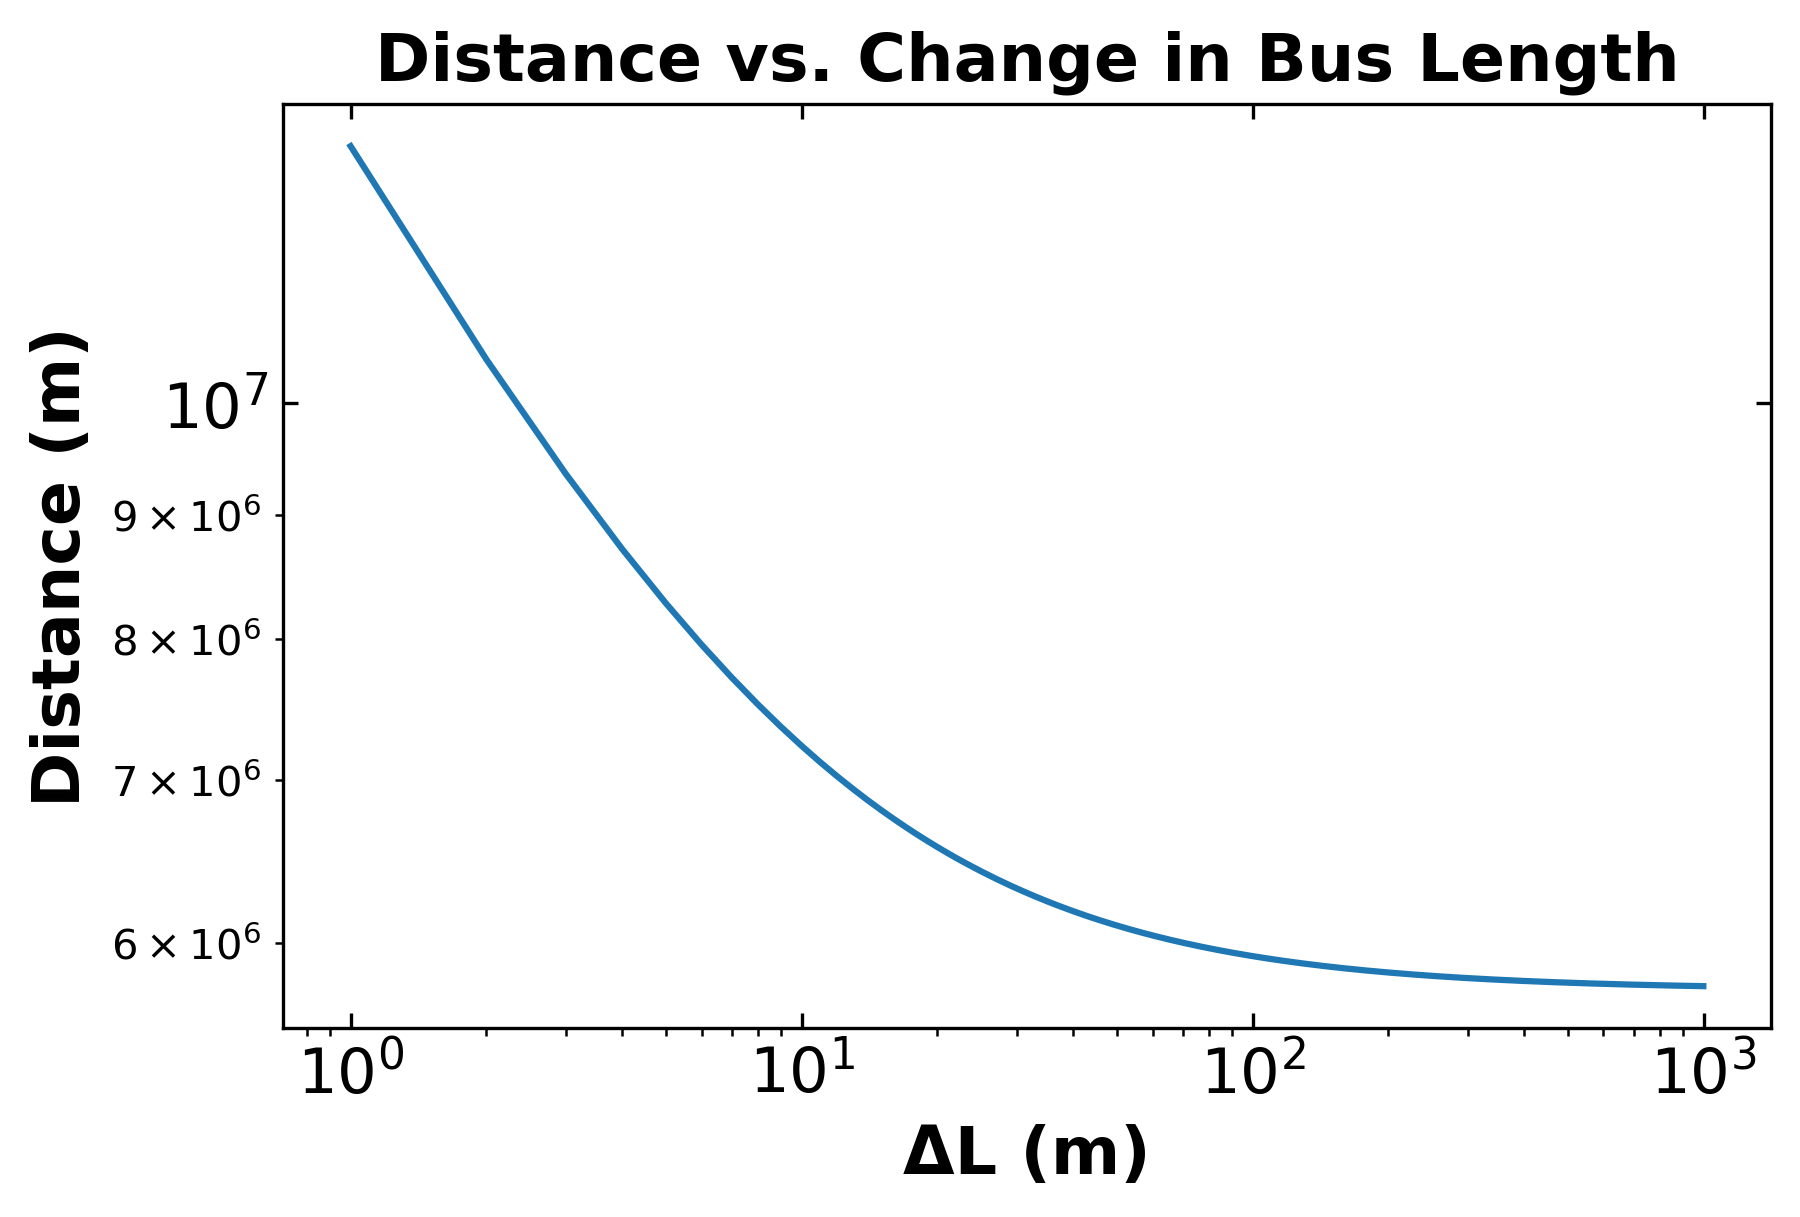

In [58]:
### BEGIN SOLUTION
# Make a plot of r(ŒîL)
dL = np.arange(1,1000,1)

fig, ax = plt.subplots(figsize = (6.4,4), dpi = 300)
ax.plot(dL, r(dL))
plt.yscale("log")
plt.xscale("log")


# define tick size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in", top=True, right=True)

# plot titile and x,y label
plt.xlabel("ŒîL (m)", fontsize=16, fontweight="bold")
plt.ylabel("Distance (m)", fontsize=16, fontweight="bold")
plt.title("Distance vs. Change in Bus Length", fontsize=16, fontweight="bold")
plt.show()
### END SOLUTION

#### 6.2.1. Discussion

Does the plot make sense given what you know about the relationship between the distance from the black hole and the subsequent tensile force on the bus?

**Discuss** in 1-3 sentences.

**Answer:**

In [ ]:
### BEGIN SOLUTION
'''
Yes, the plot make sense. As the bus gets closer to the black hole (distance decreases), ŒîL increases due to the
increase in the strength of the tensile force.
'''
### END SOLUTION